In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
%cd src
%pwd

[WinError 2] Nie można odnaleźć określonego pliku: 'src'
e:\bdcalc\src


'e:\\bdcalc\\src'

In [173]:
import bd4cnn.bd4cnn_process as bdp
import importlib
importlib.reload(bd4cnn.bd4cnn_process)

<module 'bd4cnn.bd4cnn_process' from 'e:\\bdcalc\\src\\bd4cnn\\bd4cnn_process.py'>

In [174]:
args=lambda: None 
#args.root_folder = "E:\\sim2\\pacjentka_9_1373148"
#args.root_folder = "E:\\sim2\\pacjentka_10_1377540"
args.root_folder = "E:\\sim2\\"
args.dose_levels = 17
#args.single = True
bdp.do_run(args)

ray data from file: E:\sim2\pacjentka_5_1370070/output/roi_marks_piers.nparray
2020-11-30 13:23:50,061 [INFO]: Reading ndarray data from file: E:\sim2\pacjentka_5_1370070/output/roi_marks_przelyk.nparray
2020-11-30 13:23:50,065 [INFO]: The ndarray data has shape: [179, 101, 201]
2020-11-30 13:23:50,203 [INFO]: Reading ndarray data from file: E:\sim2\pacjentka_5_1370070/output/roi_marks_pluco L.nparray
2020-11-30 13:23:50,207 [INFO]: The ndarray data has shape: [179, 101, 201]
2020-11-30 13:23:50,353 [INFO]: Reading ndarray data from file: E:\sim2\pacjentka_5_1370070/output/roi_marks_pluco P.nparray
2020-11-30 13:23:50,357 [INFO]: The ndarray data has shape: [179, 101, 201]
2020-11-30 13:23:50,482 [INFO]: Reading ndarray data from file: E:\sim2\pacjentka_5_1370070/output/roi_marks_serce.nparray
2020-11-30 13:23:50,501 [INFO]: The ndarray data has shape: [179, 101, 201]
2020-11-30 13:23:50,646 [INFO]: Reading ndarray data from file: E:\sim2\pacjentka_5_1370070/output/roi_marks_kanal kreg

In [232]:
import bdcalc.histogram as bh
import importlib
importlib.reload(bdcalc.histogram)

<module 'bdcalc.histogram' from 'e:\\bdcalc\\src\\bdcalc\\histogram.py'>

In [233]:
args = lambda: None
#args.doses_file=r"E:\sim2\pacjentka_9_1373148\output\doses_to_max\doses_to_max.nparray"
#args.rois_file=r"E:\sim2\pacjentka_9_1373148\output\roi_mapped_to_max\rois_marks_mapped.nparray"

args.doses_file=r"E:\test_network\optimal-dose-distribution\data\test\result_roi_10_new\dose_prediction.nparray"
#args.doses_file=r"E:\sim2\pacjentka_10_1377540\output\doses_to_max\doses_to_max.nparray"
args.rois_file=r"E:\sim2\pacjentka_10_1377540\output\roi_mapped_to_max\rois_marks_original.nparray"
args.roi_sids=r"E:\sim2\pacjentka_10_1377540\output\roi_mapping.txt"
args.roi_mapping=r"E:\sim2\pacjentka_10_1377540\input\roi_mapping.json"

#rois_o,doses_o, hist_o = h.histogram_cnn(args, doses_dtype=np.float32)
rois_p10,doses_p10, hist_p10 = bh.histogram_cnn(args, doses_dtype=np.uint8)

2020-11-30 16:44:44,110 [INFO]: Reading ndarray data from file: E:\sim2\pacjentka_10_1377540\output\roi_mapped_to_max\rois_marks_original.nparray
2020-11-30 16:44:44,114 [INFO]: The ndarray data has shape: [150, 140, 230]
2020-11-30 16:44:44,289 [INFO]: Reading ndarray data from file: E:\test_network\optimal-dose-distribution\data\test\result_roi_10_new\dose_prediction.nparray
Starting calculation of histograms for results from CNN
Input file with roi markers: E:\sim2\pacjentka_10_1377540\output\roi_mapped_to_max\rois_marks_original.nparray, (assuming np.unit32)
Input file with doses: E:\test_network\optimal-dose-distribution\data\test\result_roi_10_new\dose_prediction.nparray (assuming <class 'numpy.uint8'>)
2020-11-30 16:44:44,388 [INFO]: The ndarray data has shape: [150, 140, 230]
{12: 'ptv-plan', 11: 'kanal kreg.', 10: 'serce', 9: 'pluco P', 8: 'pluco L', 7: 'przelyk', 6: 'piers', 5: 'blizna', 4: 'wezly all', 3: 'gl.kosci ram.', 2: 'naczynia wienc', 1: 'Patient Outline'}
['ptv-plan

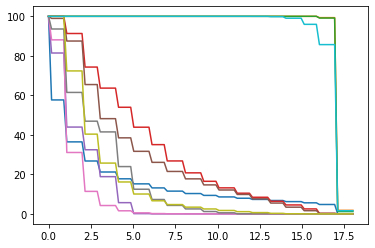

In [236]:
for h in hist_o:
    # print(h["data"])
    a = np.array(h["data"])
    plt.plot(a[:,0], a[:,1])
plt.show()

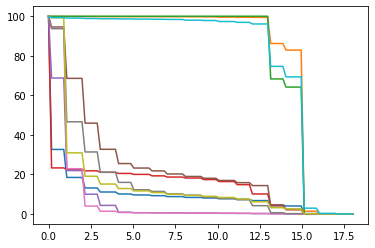

In [237]:
for h in hist_p10:
    a = np.array(h["data"])
    plt.plot(a[:,0], a[:,1])
plt.show()

In [122]:
len(hist)

8

In [84]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [208]:
from bdfileutils import read_ndarray
rois_mapped = read_ndarray(r"E:\sim2\pacjentka_10_1377540\output\roi_mapped_to_max\rois_marks_mapped.nparray", dtype=np.int32)

2020-11-30 14:39:10,894 [INFO]: Reading ndarray data from file: E:\sim2\pacjentka_10_1377540\output\roi_mapped_to_max\rois_marks_mapped.nparray
2020-11-30 14:39:10,898 [INFO]: The ndarray data has shape: [150, 140, 230]


In [211]:
@interact(z=(0,rois_o.shape[0]-1, 1))
def showme(z):
    fig = plt.figure(figsize=(20,10))
    plt.subplot(1,3,1)
    plt.imshow(doses_p10[z,:,:], vmin=0, vmax=18)
    plt.subplot(1,3,2)
    plt.imshow(doses_o[z,:,:], vmin=0, vmax=18)
    plt.subplot(1,3,3)
    plt.imshow(rois_mapped[z,:,:], vmin=0, vmax=12)

interactive(children=(IntSlider(value=74, description='z', max=149), Output()), _dom_classes=('widget-interact…

In [ ]:
args = lambda: None
#args.doses_file=r"E:\test_network\optimal-dose-distribution\data\test\result_roi_9\dose_prediction.nparray"
args.doses_file=r"E:\sim2\pacjentka_9_1373148\output\doses_to_max\doses_to_max.nparray"
args.rois_file=r"E:\sim2\pacjentka_9_1373148\output\roi_mapped_to_max\rois_marks_mapped.nparray"
rois,doses, hist = h.histogram_cnn(args, doses_dtype=np.float32)

#args.doses_file=r"E:\test_network\optimal-dose-distribution\data\test\result_roi_9\dose_prediction.nparray"
args.doses_file=r"E:\sim2\pacjentka_9_1373148\output\doses_to_max\doses_to_max.nparray"
args.rois_file=r"E:\sim2\pacjentka_9_1373148\output\roi_mapped_to_max\rois_marks_mapped.nparray"
rois,doses, hist = h.histogram_cnn(args, doses_dtype=np.float32)

In [214]:
from bdfileutils import read_ndarray
dp = read_ndarray(r"E:\test_network\optimal-dose-distribution\data\test\result_roi_10_new\dose_prediction.nparray", dtype=np.uint8)
np.max(dp)

2020-11-30 15:16:22,264 [INFO]: Reading ndarray data from file: E:\test_network\optimal-dose-distribution\data\test\result_roi_10_new\dose_prediction.nparray
2020-11-30 15:16:22,269 [INFO]: The ndarray data has shape: [150, 140, 230]


18